In [6]:
import tensorflow as tf

# Define the autoencoder architecture
input_dim = 784  # 28x28 pixels
hidden_dim = 128
latent_dim = 32

# Encoder
encoder = tf.keras.models.Sequential([
    tf.keras.layers.Dense(hidden_dim, activation='relu', input_shape=(input_dim,)),
    tf.keras.layers.Dense(latent_dim, activation='relu')
])

# Decoder
decoder = tf.keras.models.Sequential([
    tf.keras.layers.Dense(hidden_dim, activation='relu', input_shape=(latent_dim,)),
    tf.keras.layers.Dense(input_dim, activation='sigmoid')
])

# Combine encoder and decoder
autoencoder = tf.keras.models.Sequential([encoder, decoder])

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mse')

# Load and preprocess the MNIST dataset
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(-1, input_dim) / 255.0
x_test = x_test.reshape(-1, input_dim) / 255.0

# Train the autoencoder
autoencoder.fit(x_train, x_train, epochs=10, batch_size=128, validation_data=(x_test, x_test))

# Use the trained autoencoder for reconstruction
reconstructed_images = autoencoder.predict(x_test)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0713 - val_loss: 0.0226
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0210 - val_loss: 0.0161
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0159 - val_loss: 0.0138
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0136 - val_loss: 0.0122
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0124 - val_loss: 0.0115
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0117 - val_loss: 0.0111
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0113 - val_loss: 0.0106
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0108 - val_loss: 0.0103
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0105 - val_loss: 0.0099
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0102 - val_loss: 0.0097
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


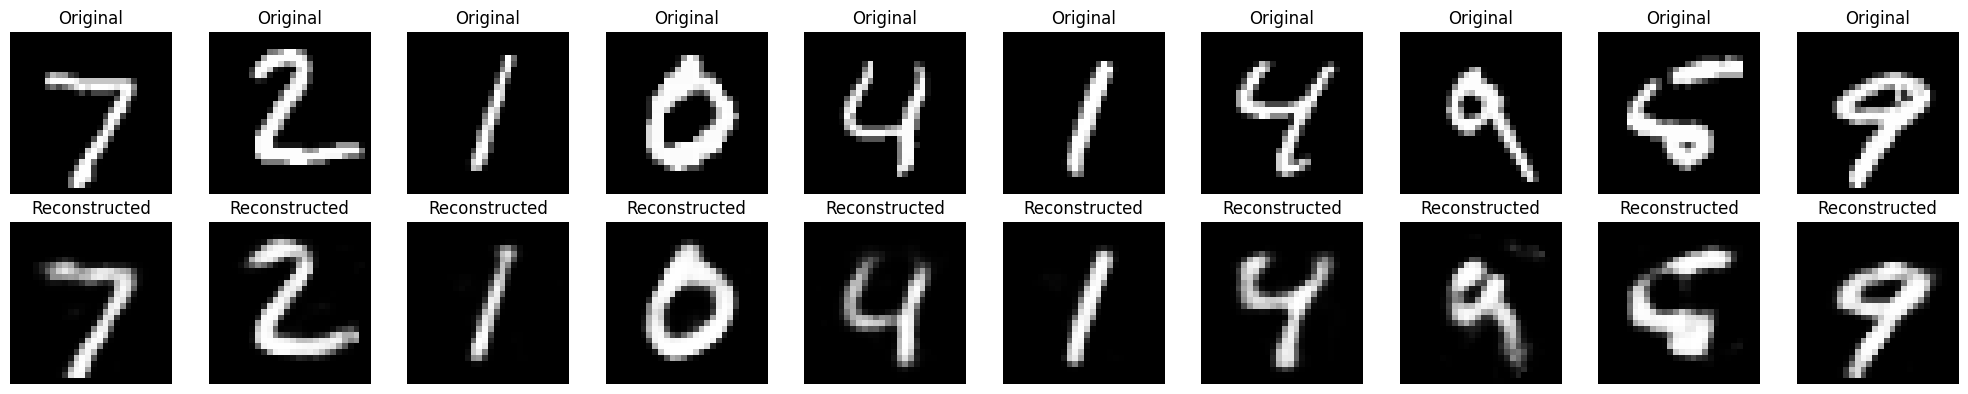

In [7]:
import matplotlib.pyplot as plt

# Pick a few test images
n = 10
sample_images = x_test[:n]
reconstructed = autoencoder.predict(sample_images)

# Plot original and reconstructed images
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis("off")

    # Reconstructed image
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis("off")
plt.tight_layout()
plt.show()


In [8]:
test_loss = autoencoder.evaluate(x_test, x_test)
print(f"Test Loss (MSE): {test_loss:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0101
Test Loss (MSE): 0.0097


In [9]:
encoded_imgs = encoder.predict(x_test)

# If latent_dim == 2, you can plot it directly:
if latent_dim == 2:
    plt.scatter(encoded_imgs[:, 0], encoded_imgs[:, 1], alpha=0.5)
    plt.title("2D Latent Space")
    plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


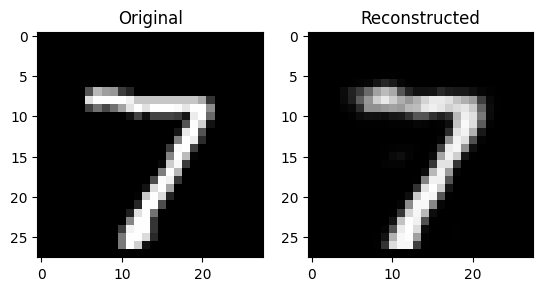

In [10]:
# example: test on a single image
import numpy as np

test_img = x_test[0:1]  # shape (1, 784)
reconstructed_img = autoencoder.predict(test_img)

# Visualize
plt.subplot(1, 2, 1)
plt.imshow(test_img.reshape(28, 28), cmap='gray')
plt.title("Original")

plt.subplot(1, 2, 2)
plt.imshow(reconstructed_img.reshape(28, 28), cmap='gray')
plt.title("Reconstructed")

plt.show()
